<a href="https://colab.research.google.com/github/Aika-T-H-Li/Y3IndividualProject/blob/main/CO2_data_extraction_and_plot_for_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import pandas as pd
import json
import urllib.request
import datetime as dt
import matplotlib.pyplot as plt
pd.set_option('max_rows', 99999) ##showing all posible CO2 reading 

matplotlib.rcParams.update({
    'font.size': 24
})

In [ ]:
##Setting the  date of data recorded(global)
startDate = dt.datetime.strptime('2020-02-12T00:00:00+0000', "%Y-%m-%dT%H:%M:%S%z")
endDate   = dt.datetime.strptime('2020-02-12T23:59:59+0000', "%Y-%m-%dT%H:%M:%S%z")
##Global dt for weekday
weekdaystartDate = dt.datetime.strptime('2020-02-10T00:00:00+0000', "%Y-%m-%dT%H:%M:%S%z")
weekdayendDate   = dt.datetime.strptime('2020-02-14T23:59:59+0000', "%Y-%m-%dT%H:%M:%S%z")
##Global dt for weekend
weekendstartDate = dt.datetime.strptime('2020-02-15T00:00:00+0000', "%Y-%m-%dT%H:%M:%S%z")
weekendendDate   = dt.datetime.strptime('2020-02-16T23:59:59+0000', "%Y-%m-%dT%H:%M:%S%z")

In [ ]:
##check avaliable sensors of room/or look at the 3D model
##def COs avalibility
room = '3-032' ##enter room number in 'floor-room number
callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/entity/'
callroom = callBase + room

usbRoomData = json.loads(
urllib.request
  .urlopen(callroom)
  .read()
   .decode('utf-8')
)['feed']

for variable in usbRoomData:
    print(variable['metric']) 


Mode Input
Heating Valve Position
Actual Cooling Set point
Actual Heating Set point
Cooling Valve Position
Room Temperature
Relative Humidity
CO2
Occupancy Sensor
Mode


In [ ]:
##Extracting CO2 data from API
room = 'room-3-031'
CO2 = 'CO2'


## use timeseries callbase for data between a specfic period
## use shorter period of dt if 413
callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callCO2_3_031 = callBase + room + '/' + str(CO2).replace(' ', '%20') + '/raw/historic/?startTime=' +startDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + endDate.isoformat().replace('+00:00', 'Z')
usbCO2_3_031 = json.loads(

urllib.request
  .urlopen(callCO2_3_031)
  .read()
  .decode('utf-8')
)['historic']['values']


print(callCO2_3_031)
print(CO2+' has '+str(len(usbCO2_3_031))+' readings. ')##avalible readings for CO2

dfCO2_3_031 = pd.DataFrame.from_records(usbCO2_3_031, exclude=['duration'])
dfCO2_3_031.index = pd.to_datetime(dfCO2_3_031["time"])
dfCO2_3_031 = dfCO2_3_031.drop(columns="time")
dfCO2_3_031

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-3-031/CO2/raw/historic/?startTime=2020-02-12T00:00:00Z&endTime=2020-02-12T23:59:59Z
CO2 has 173 readings. 


,value
time,
2020-02-12 23:59:15.953000+00:00,452.80
2020-02-12 23:44:13.406000+00:00,456.96
2020-02-12 23:29:15.080000+00:00,461.76
2020-02-12 23:14:15.637000+00:00,465.92
2020-02-12 22:59:12.822000+00:00,470.72
2020-02-12 22:55:59.966000+00:00,480.96
2020-02-12 22:53:27.851000+00:00,470.72
2020-02-12 22:45:47.023000+00:00,480.96
2020-02-12 22:44:38.697000+00:00,470.72


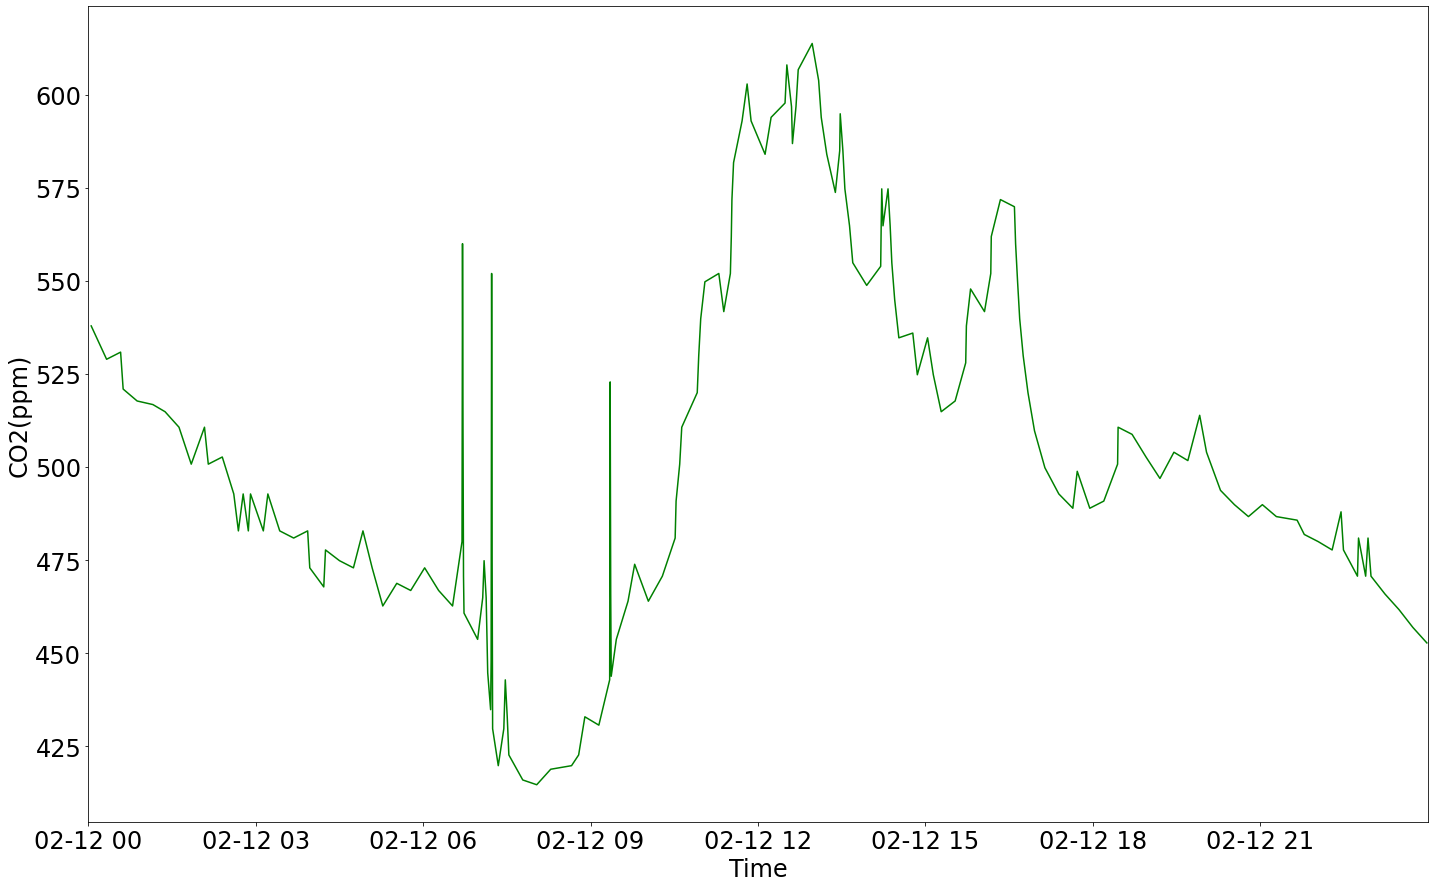

In [ ]:
##def plot graph for CO2 againt time
fig, ax = plt.subplots(figsize=(24,15)) 

plt.xlim(startDate,endDate)

ax.set_xlabel('Time')
ax.set_ylabel('CO2(ppm)', color='black')
ax.plot(dfCO2_3_031["value"], color='green')
ax.tick_params(axis='y', labelcolor='black')

plt.show()

In [ ]:
#Occpancy sensor feedback
room = 'room-3-031'
OSensor3031 = 'Occupancy Sensor'

callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callOSensor3031 = callBase + room + '/' + str(OSensor3031).replace(' ', '%20') + '/raw/historic/?startTime=' +\
startDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + endDate.isoformat().replace('+00:00', 'Z')
usbOSensor3031 = json.loads(
urllib.request
.urlopen(callOSensor3031)
.read()
.decode('utf-8')
)['historic']['values']


print(callOSensor3031)
print(OSensor3031+' has '+str(len(usbOSensor3031))+' readings. ')

dfOSensor3031 = pd.DataFrame.from_records(usbOSensor3031, exclude=['duration'])
dfOSensor3031.index = pd.to_datetime(dfOSensor3031["time"])
dfOSensor3031 = dfOSensor3031.drop(columns="time")
dfOSensor3031

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-3-031/Occupancy%20Sensor/raw/historic/?startTime=2020-02-12T00:00:00Z&endTime=2020-02-12T23:59:59Z
Occupancy Sensor has 24 readings. 


,value
time,
2020-02-12 23:32:18.328000+00:00,0
2020-02-12 23:17:08.478000+00:00,1
2020-02-12 23:10:34.866000+00:00,0
2020-02-12 22:44:25.984000+00:00,1
2020-02-12 22:41:29.402000+00:00,0
2020-02-12 22:01:23.223000+00:00,1
2020-02-12 21:47:51.596000+00:00,0
2020-02-12 21:13:13.776000+00:00,1
2020-02-12 21:09:36.764000+00:00,0


In [ ]:
##Extracting CO2 data from API
room = 'room-3-032'
CO2 = 'CO2'

 
callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callCO2_3_032 = callBase + room + '/' + str(CO2).replace(' ', '%20') + '/raw/historic/?startTime=' +\
startDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + endDate.isoformat().replace('+00:00', 'Z')
usbCO2_3_032 = json.loads(

urllib.request
  .urlopen(callCO2_3_032)
  .read()
  .decode('utf-8')
)['historic']['values']


print(callCO2_3_032)
print(CO2+' has '+str(len(usbCO2_3_032))+' readings. ')##avalible readings for CO2

dfCO2_3_032 = pd.DataFrame.from_records(usbCO2_3_032, exclude=['duration'])
dfCO2_3_032.index = pd.to_datetime(dfCO2_3_032["time"])
dfCO2_3_032 = dfCO2_3_032.drop(columns="time")
dfCO2_3_032

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-3-032/CO2/raw/historic/?startTime=2020-02-12T00:00:00Z&endTime=2020-02-12T23:59:59Z
CO2 has 128 readings. 


,value
time,
2020-02-12 23:51:39.225000+00:00,477.76
2020-02-12 23:36:40.602000+00:00,480.00
2020-02-12 23:06:39.103000+00:00,484.80
2020-02-12 22:36:41.513000+00:00,486.72
2020-02-12 22:10:25.110000+00:00,488.96
2020-02-12 21:51:41.244000+00:00,489.92
2020-02-12 21:40:26.931000+00:00,493.76
2020-02-12 21:21:39.802000+00:00,494.72
2020-02-12 20:51:34.340000+00:00,492.80


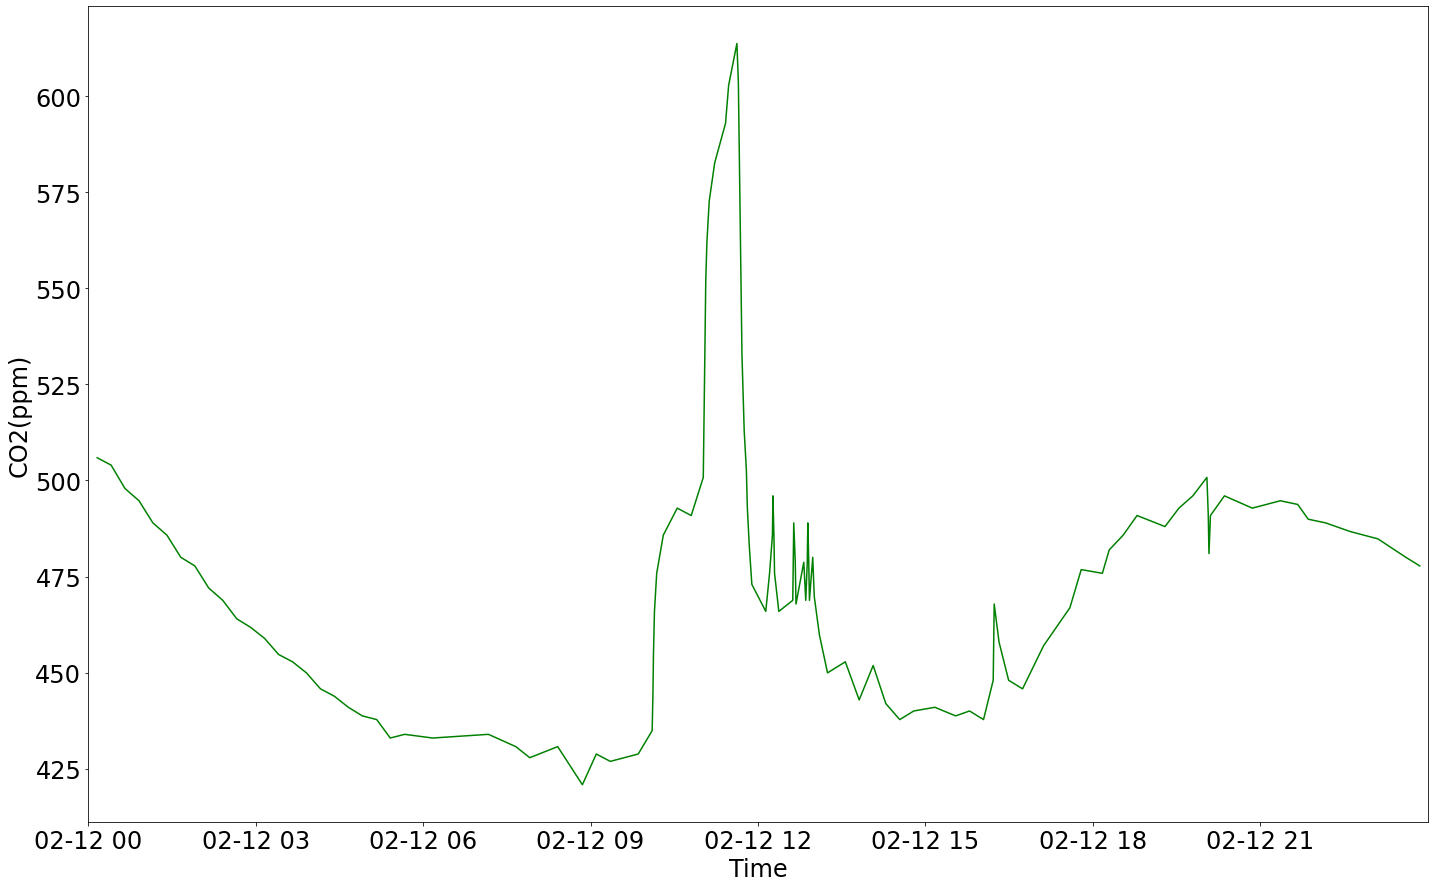

In [ ]:
fig, ax = plt.subplots(figsize=(24,15)) 

plt.xlim(startDate,endDate)

ax.set_xlabel('Time')
ax.set_ylabel('CO2(ppm)', color='black')
ax.plot(dfCO2_3_032["value"], color='green')
ax.tick_params(axis='y', labelcolor='black')

plt.show()

In [ ]:
room = 'room-3-032'
OSensor3032 = 'Occupancy Sensor'
callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callOSensor3032 = callBase + room + '/' + str(OSensor3032).replace(' ', '%20') + '/raw/historic/?startTime=' +\
startDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + endDate.isoformat().replace('+00:00', 'Z')
usbOSensor3032 = json.loads(
urllib.request
.urlopen(callOSensor3032)
.read()

)['historic']['values']


print(callOSensor3032)
print(OSensor3032+' has '+str(len(usbOSensor3032))+' readings. ')

dfOSensor3032 = pd.DataFrame.from_records(usbOSensor3032, exclude=['duration'])
dfOSensor3032.index = pd.to_datetime(dfOSensor3032["time"])
dfOSensor3032 = dfOSensor3032.drop(columns="time")
dfOSensor3032

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-3-032/Occupancy%20Sensor/raw/historic/?startTime=2020-02-12T00:00:00Z&endTime=2020-02-12T23:59:59Z
Occupancy Sensor has 18 readings. 


,value
time,
2020-02-12 20:38:39.635000+00:00,0
2020-02-12 20:03:29.624000+00:00,1
2020-02-12 17:26:32.395000+00:00,0
2020-02-12 17:00:31.634000+00:00,1
2020-02-12 16:28:25.544000+00:00,0
2020-02-12 16:08:25.633000+00:00,1
2020-02-12 14:21:13.879000+00:00,0
2020-02-12 14:00:58.330000+00:00,1
2020-02-12 14:00:22.347000+00:00,0


In [ ]:
room = 'room-4-018'
CO2 = 'CO2'
callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

##reminder)Using smaller time period otherwise might result in 413 
callCO2_4_018 = callBase + room + '/' + str(CO2).replace(' ', '%20') + '/raw/historic/?startTime=' +\
startDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + endDate.isoformat().replace('+00:00', 'Z')
usbCO2_4_018 = json.loads(

urllib.request
  .urlopen(callCO2_4_018)
  .read()
  .decode('utf-8')
)['historic']['values']


print(callCO2_4_018)
print(CO2+' has '+str(len(usbCO2_4_018))+' readings. ')##avalible readings for CO2

dfCO2_4_018 = pd.DataFrame.from_records(usbCO2_4_018, exclude=['duration'])
dfCO2_4_018.index = pd.to_datetime(dfCO2_4_018["time"])
dfCO2_4_018 = dfCO2_4_018.drop(columns="time")
dfCO2_4_018

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-4-018/CO2/raw/historic/?startTime=2020-02-12T00:00:00Z&endTime=2020-02-12T23:59:59Z
CO2 has 118 readings. 


,value
time,
2020-02-12 23:39:44.003000+00:00,425.92
2020-02-12 23:13:10.416000+00:00,424.96
2020-02-12 23:09:41.669000+00:00,427.84
2020-02-12 22:43:09.786000+00:00,428.80
2020-02-12 22:28:06.782000+00:00,432.96
2020-02-12 22:09:39.220000+00:00,438.72
2020-02-12 21:13:04.657000+00:00,437.76
2020-02-12 20:58:06.270000+00:00,440.96
2020-02-12 20:43:03.661000+00:00,438.72


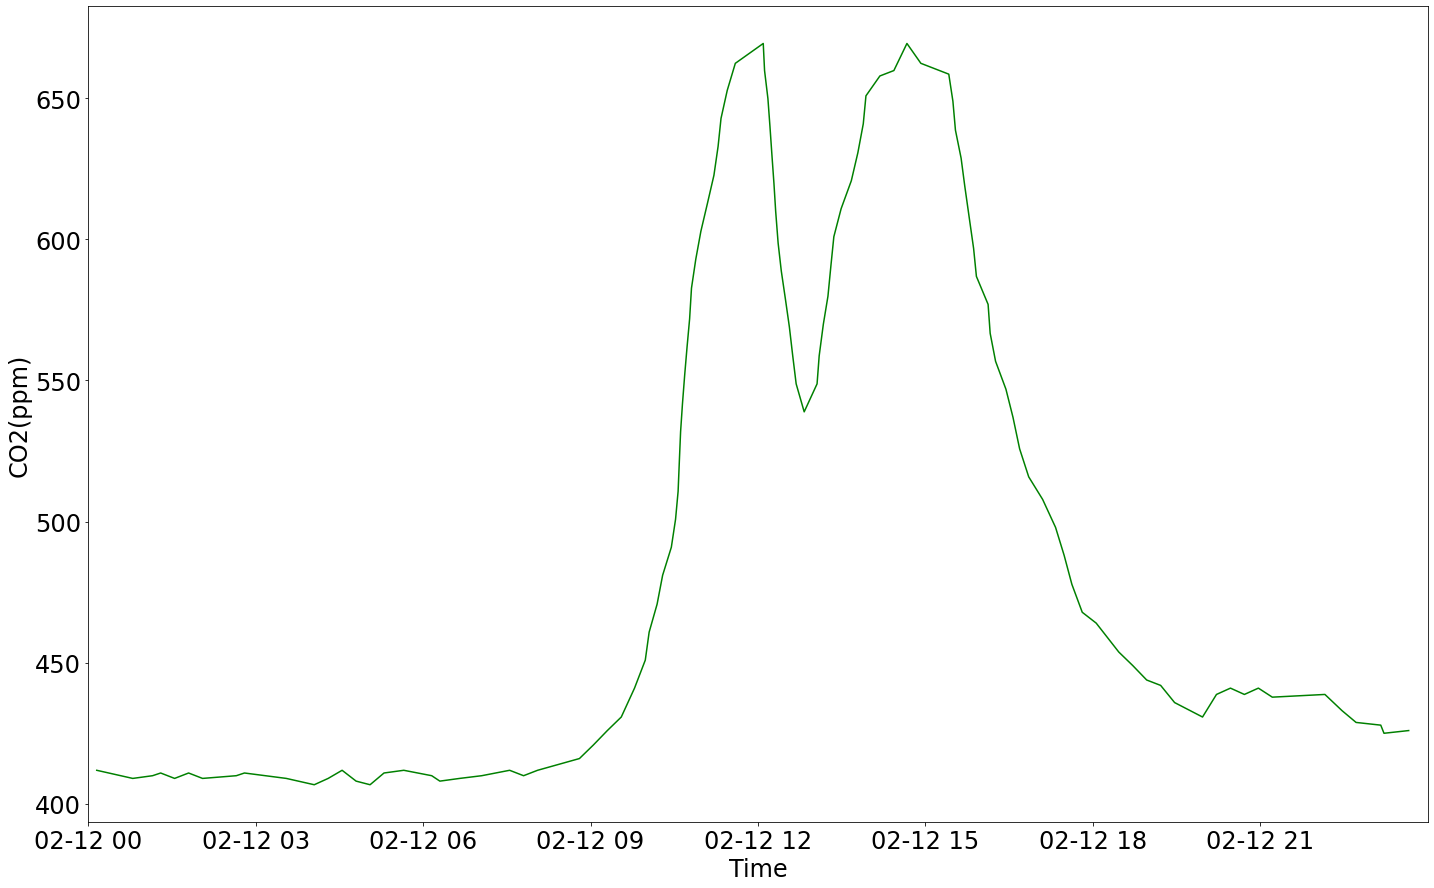

In [ ]:
fig, ax = plt.subplots(figsize=(24,15)) 
plt.xlim(startDate,endDate)
ax.set_xlabel('Time')
ax.set_ylabel('CO2(ppm)', color='black')
ax.plot(dfCO2_4_018["value"], color='green')
ax.tick_params(axis='y', labelcolor='black')

plt.show()

In [ ]:
room = 'room-4-018'
OSensor4018 = 'Occupancy Sensor'
callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callOSensor4018 = callBase + room + '/' + str(OSensor4018).replace(' ', '%20') + '/raw/historic/?startTime=' +\
startDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + endDate.isoformat().replace('+00:00', 'Z')
usbOSensor4018 = json.loads(
urllib.request
.urlopen(callOSensor4018)
.read()
.decode('utf-8')
)['historic']['values']


print(callOSensor4018)
print(OSensor4018+' has '+str(len(usbOSensor4018))+' readings. ')

dfOSensor4018 = pd.DataFrame.from_records(usbOSensor4018, exclude=['duration'])
dfOSensor4018.index = pd.to_datetime(dfOSensor4018["time"])
dfOSensor4018 = dfOSensor4018.drop(columns="time")
dfOSensor4018

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-4-018/Occupancy%20Sensor/raw/historic/?startTime=2020-02-12T00:00:00Z&endTime=2020-02-12T23:59:59Z
Occupancy Sensor has 12 readings. 


,value
time,
2020-02-12 22:38:48.376000+00:00,0
2020-02-12 22:20:13.022000+00:00,1
2020-02-12 22:18:56.551000+00:00,0
2020-02-12 21:55:52.382000+00:00,1
2020-02-12 21:54:12.042000+00:00,0
2020-02-12 21:39:09.119000+00:00,1
2020-02-12 21:17:37.022000+00:00,0
2020-02-12 20:44:47.179000+00:00,1
2020-02-12 20:44:15.481000+00:00,0


In [ ]:
##weekday CO2 at entrance for outdoor CO2 level
entrance = 'room-G-063'
CO2 = 'CO2'
callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'


callCO2_G_063_weekday = callBase + entrance + '/' + str(CO2).replace(' ', '%20') + '/raw/historic/?startTime=' +\
weekdaystartDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + weekdayendDate.isoformat().replace('+00:00', 'Z')
usbCO2_G_063_weekday = json.loads(

urllib.request
  .urlopen(callCO2_G_063_weekday)
  .read()
  .decode('utf-8')
)['historic']['values']


print(callCO2_G_063_weekday)
print(CO2+' has '+str(len(usbCO2_G_063_weekday))+' readings. ')##avalible readings for CO2

dfCO2_G_063_weekday = pd.DataFrame.from_records(usbCO2_G_063_weekday, exclude=['duration'])
dfCO2_G_063_weekday.index = pd.to_datetime(dfCO2_G_063_weekday["time"])
dfCO2_G_063_weekday = dfCO2_G_063_weekday.drop(columns="time")
dfCO2_G_063_weekday

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-G-063/CO2/raw/historic/?startTime=2020-02-10T00:00:00Z&endTime=2020-02-14T23:59:59Z
CO2 has 757 readings. 


,value
time,
2020-02-14 23:54:12.868000+00:00,420.80
2020-02-14 23:24:15.381000+00:00,418.88
2020-02-14 22:53:13.359000+00:00,419.84
2020-02-14 22:23:11.859000+00:00,421.76
2020-02-14 22:08:13.383000+00:00,424.00
2020-02-14 21:24:13.145000+00:00,421.76
2020-02-14 21:08:06.283000+00:00,422.72
2020-02-14 20:53:03.728000+00:00,424.00
2020-02-14 20:38:05.582000+00:00,425.92


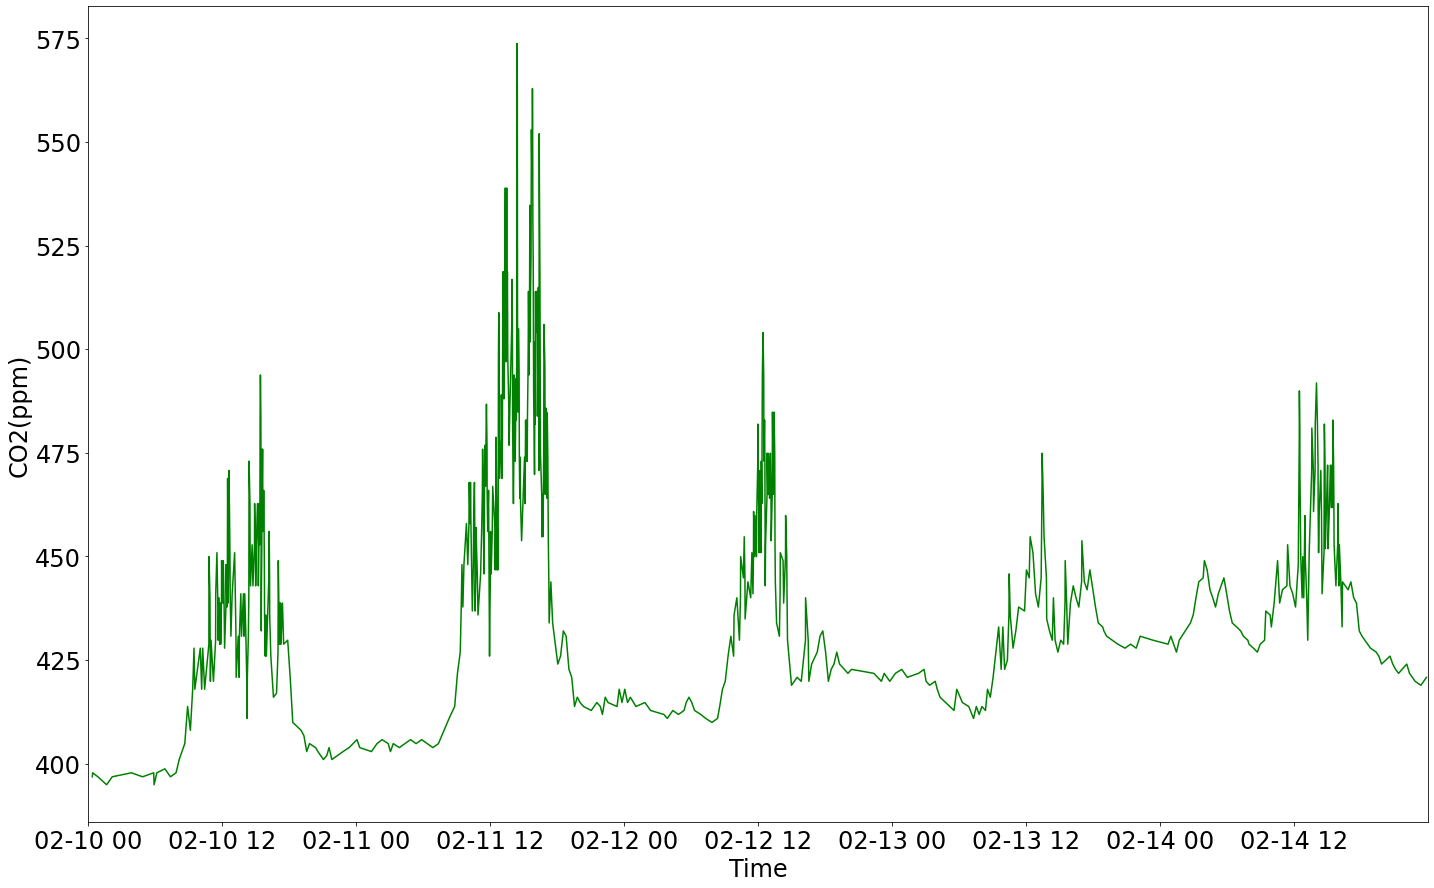

In [ ]:
fig, ax = plt.subplots(figsize=(24,15)) 

plt.xlim(weekdaystartDate,weekdayendDate)

ax.set_xlabel('Time')
ax.set_ylabel('CO2(ppm)', color='black')
ax.plot(dfCO2_G_063_weekday["value"], color='green')
ax.tick_params(axis='y', labelcolor='black')

In [ ]:
##for weekend CO2 data
entrance = 'room-G-063'
CO2 = 'CO2'
callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'


callCO2_G_063_weekend = callBase + entrance + '/' + str(CO2).replace(' ', '%20') + '/raw/historic/?startTime=' +\
weekendstartDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + weekendendDate.isoformat().replace('+00:00', 'Z')
usbCO2_G_063_weekend = json.loads(

urllib.request
  .urlopen(callCO2_G_063_weekend)
  .read()
  .decode('utf-8')
)['historic']['values']


print(callCO2_G_063_weekend)
print(CO2+' has '+str(len(usbCO2_G_063_weekend))+' readings. ')##avalible readings for CO2

dfCO2_G_063_weekend = pd.DataFrame.from_records(usbCO2_G_063_weekend, exclude=['duration'])
dfCO2_G_063_weekend.index = pd.to_datetime(dfCO2_G_063_weekend["time"])
dfCO2_G_063_weekend = dfCO2_G_063_weekend.drop(columns="time")
dfCO2_G_063_weekend

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-G-063/CO2/raw/historic/?startTime=2020-02-15T00:00:00Z&endTime=2020-02-16T23:59:59Z
CO2 has 90 readings. 


,value
time,
2020-02-16 23:55:14.647000+00:00,403.84
2020-02-16 23:25:13.394000+00:00,402.88
2020-02-16 22:39:53.236000+00:00,403.84
2020-02-16 21:55:16.169000+00:00,402.88
2020-02-16 20:54:45.735000+00:00,401.92
2020-02-16 20:39:47.013000+00:00,403.84
2020-02-16 20:25:08.611000+00:00,401.92
2020-02-16 19:54:47.461000+00:00,400.96
2020-02-16 19:39:41.040000+00:00,403.84


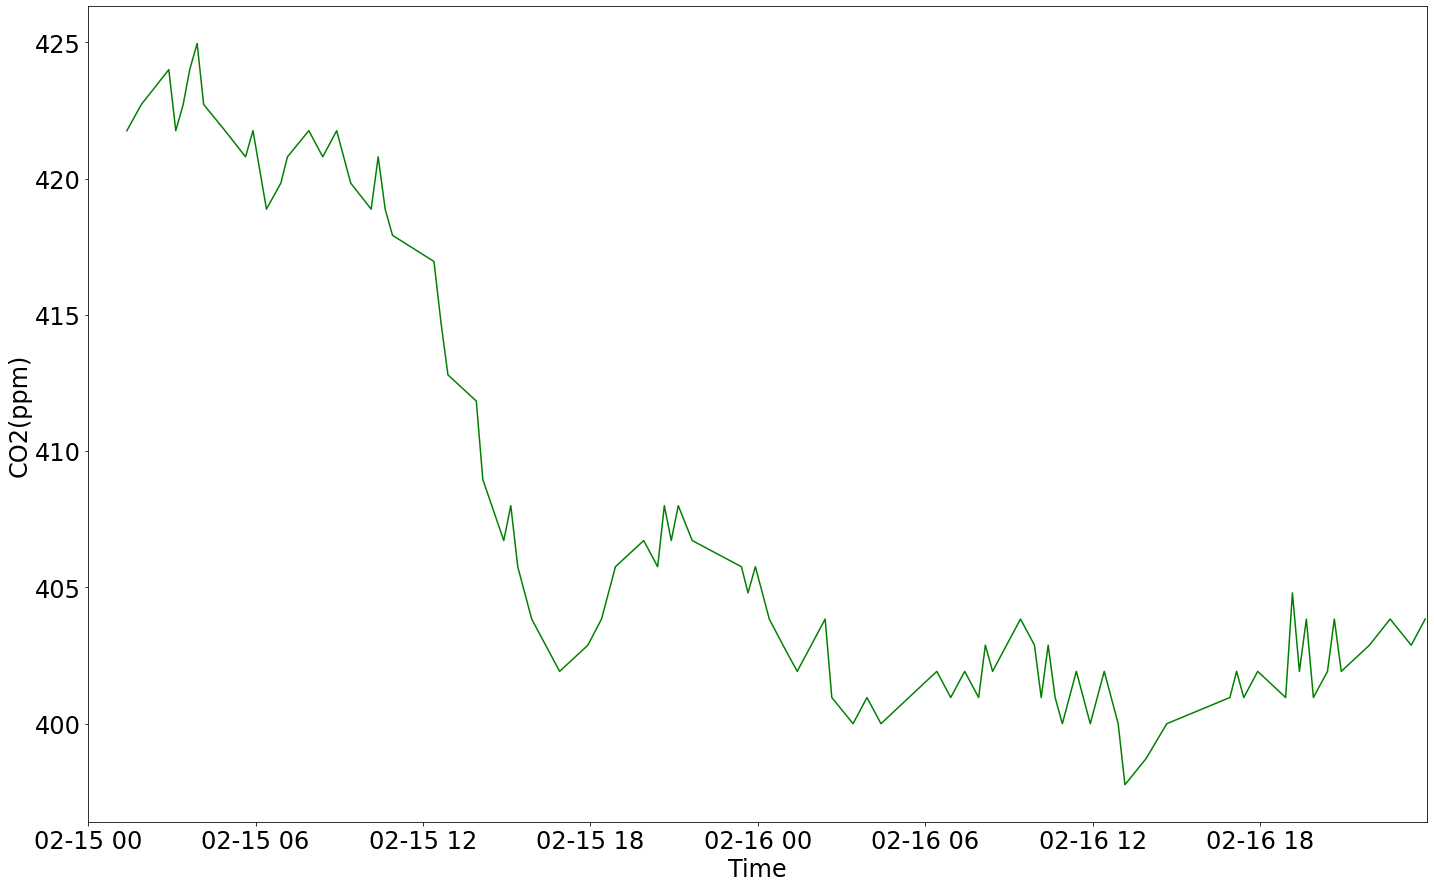

In [ ]:
fig, ax = plt.subplots(figsize=(24,15)) 

plt.xlim(weekendstartDate,weekendendDate)

ax.set_xlabel('Time')
ax.set_ylabel('CO2(ppm)', color='black')
ax.plot(dfCO2_G_063_weekend["value"], color='green')
ax.tick_params(axis='y', labelcolor='black')

plt.show()

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-3-031/CO2/raw/historic/?startTime=2020-02-15T00:00:00Z&endTime=2020-02-16T23:59:59Z
CO2 has 142 readings. 


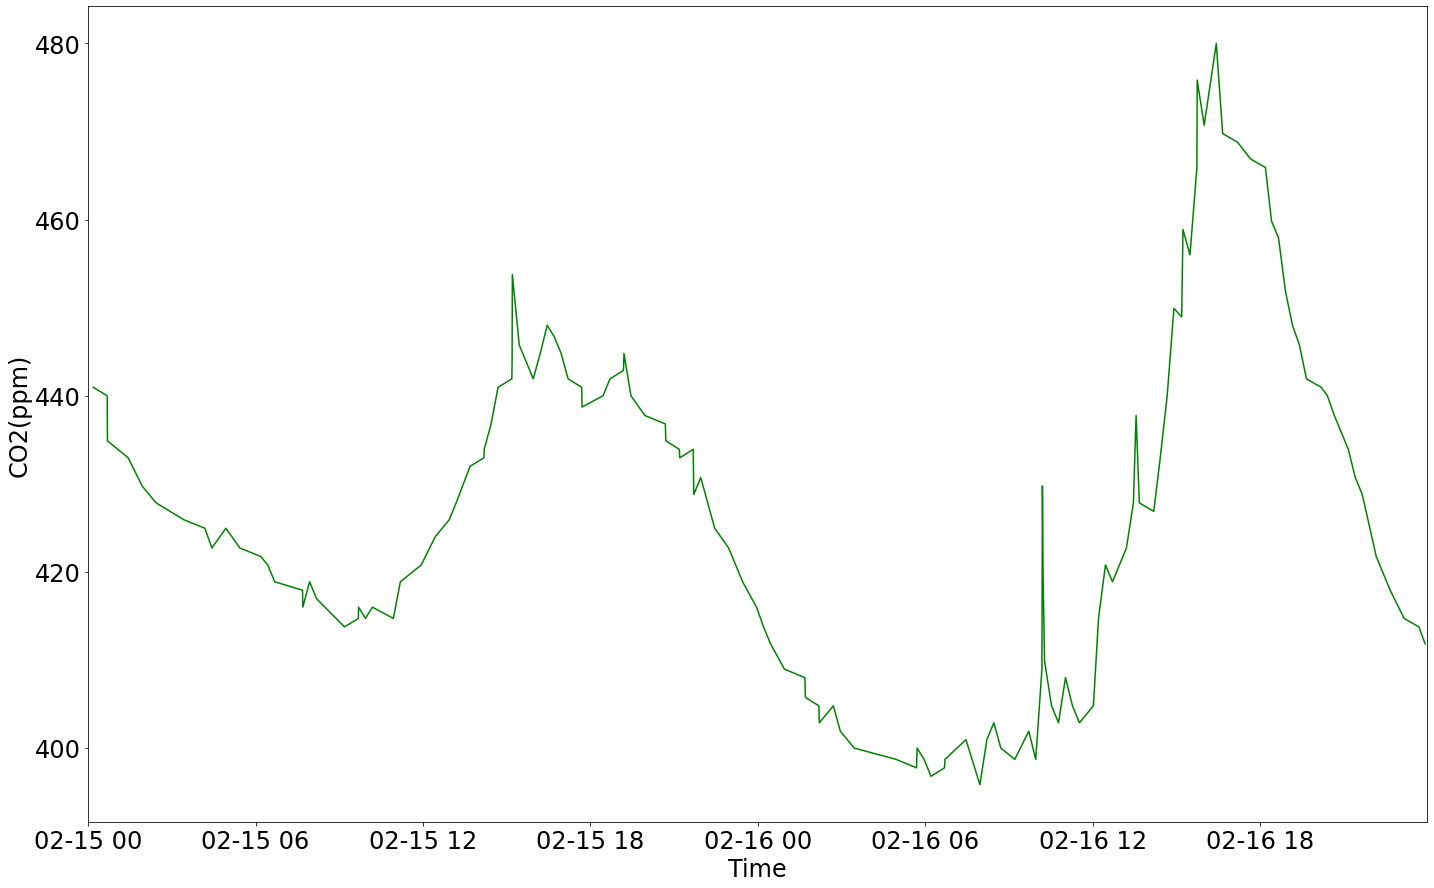

In [ ]:
## weekend for 3 room
room = 'room-3-031'
CO2 = 'CO2'

callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callCO2_3_031_weekend = callBase + room + '/' + str(CO2).replace(' ', '%20') + '/raw/historic/?startTime=' + weekendstartDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + weekendendDate.isoformat().replace('+00:00', 'Z')
usbCO2_3_031_weekend = json.loads(

urllib.request
  .urlopen(callCO2_3_031_weekend)
  .read()
  .decode('utf-8')
)['historic']['values']


print(callCO2_3_031_weekend)
print(CO2+' has '+str(len(usbCO2_3_031_weekend))+' readings. ')##avalible readings for CO2

dfCO2_3_031_weekend = pd.DataFrame.from_records(usbCO2_3_031_weekend, exclude=['duration'])
dfCO2_3_031_weekend.index = pd.to_datetime(dfCO2_3_031_weekend["time"])
dfCO2_3_031_weekend = dfCO2_3_031_weekend.drop(columns="time")
dfCO2_3_031_weekend

fig, ax = plt.subplots(figsize=(24,15)) 

plt.xlim(weekendstartDate,weekendendDate)

ax.set_xlabel('Time')
ax.set_ylabel('CO2(ppm)', color='black')
ax.plot(dfCO2_3_031_weekend["value"], color='green')
ax.tick_params(axis='y', labelcolor='black')

plt.show()

In [ ]:
room = 'room-3-031'

OSensor3031_weekend = 'Occupancy Sensor'


## Update Call Base
callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callOSensor3031_weekend= callBase + room + '/' + str(OSensor3031_weekend).replace(' ', '%20') + '/raw/historic/?startTime=' +\
weekendstartDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + weekendendDate.isoformat().replace('+00:00', 'Z')
usbOSensor3031_weekend = json.loads(
urllib.request
.urlopen(callOSensor3031_weekend)
.read()

)['historic']['values']


print(callOSensor3031_weekend)
print(OSensor3031_weekend+' has '+str(len(usbOSensor3031_weekend))+' readings. ')

dfOSensor3031_weekend = pd.DataFrame.from_records(usbOSensor3031_weekend, exclude=['duration'])
dfOSensor3031_weekend.index = pd.to_datetime(dfOSensor3031_weekend["time"])
dfOSensor3031_weekend = dfOSensor3031_weekend.drop(columns="time")
dfOSensor3031_weekend

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-3-031/Occupancy%20Sensor/raw/historic/?startTime=2020-02-15T00:00:00Z&endTime=2020-02-16T23:59:59Z
Occupancy Sensor has 62 readings. 


,value
time,
2020-02-16 18:27:59.585000+00:00,0
2020-02-16 18:12:49.020000+00:00,1
2020-02-16 18:05:36.298000+00:00,0
2020-02-16 17:49:08.111000+00:00,1
2020-02-16 16:40:47.662000+00:00,0
2020-02-16 16:22:52.227000+00:00,1
2020-02-16 16:16:30.928000+00:00,0
2020-02-16 16:01:28.325000+00:00,1
2020-02-16 16:00:56.792000+00:00,0


https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-4-018/CO2/raw/historic/?startTime=2020-02-15T00:00:00Z&endTime=2020-02-16T23:59:59Z
CO2 has 141 readings. 


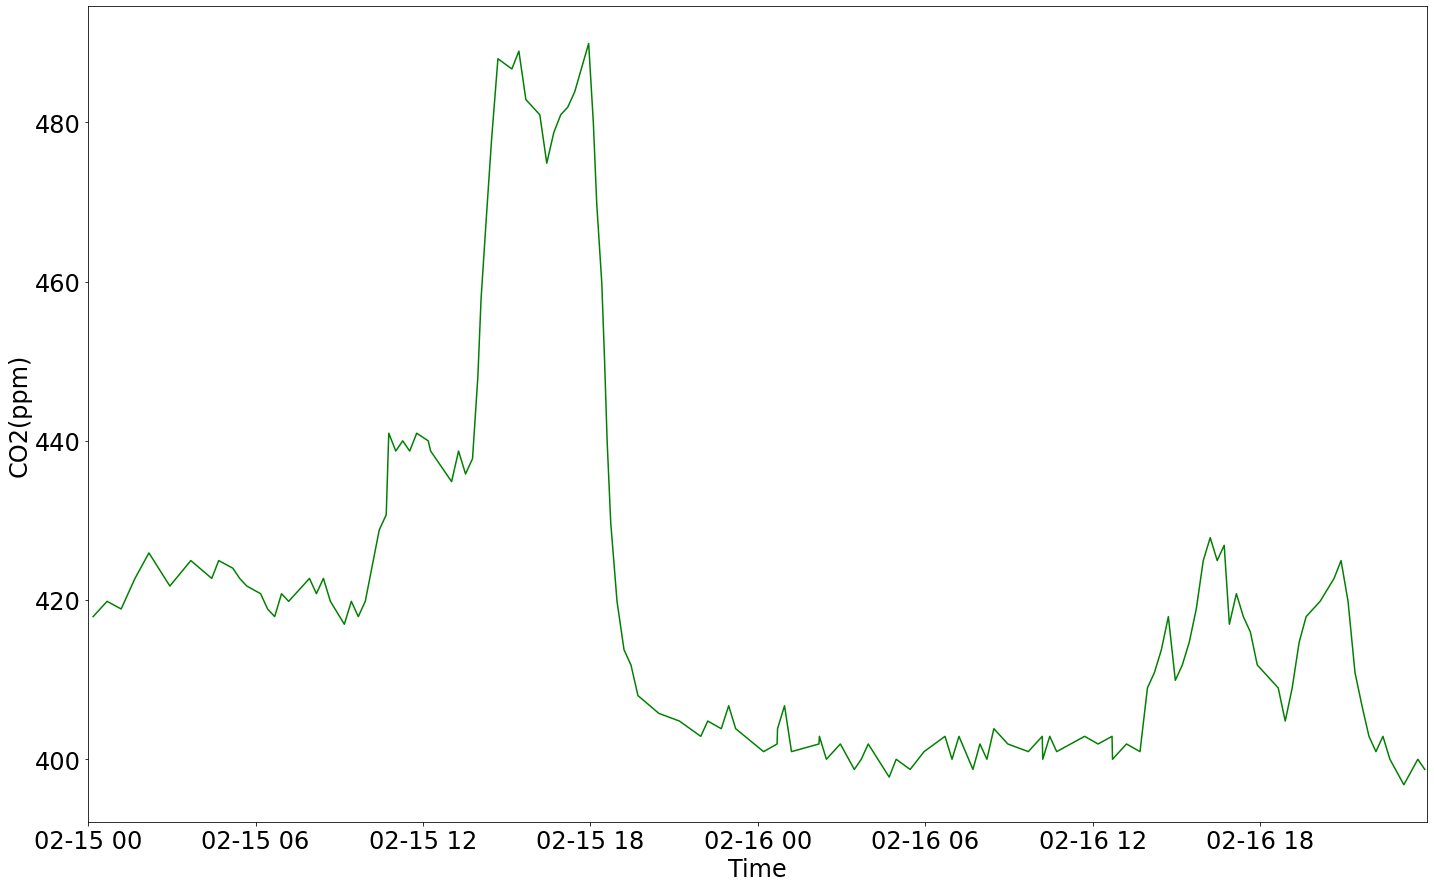

In [ ]:
room = 'room-4-018'
CO2 = 'CO2'

callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callCO2_4_018_weekend = callBase + room + '/' + str(CO2).replace(' ', '%20') + '/raw/historic/?startTime=' + weekendstartDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + weekendendDate.isoformat().replace('+00:00', 'Z')
usbCO2_4_018_weekend = json.loads(

urllib.request
  .urlopen(callCO2_4_018_weekend)
  .read()
  .decode('utf-8')
)['historic']['values']


print(callCO2_4_018_weekend)
print(CO2+' has '+str(len(usbCO2_4_018_weekend))+' readings. ')##avalible readings for CO2

dfCO2_4_018_weekend = pd.DataFrame.from_records(usbCO2_4_018_weekend, exclude=['duration'])
dfCO2_4_018_weekend.index = pd.to_datetime(dfCO2_4_018_weekend["time"])
dfCO2_4_018_weekend = dfCO2_4_018_weekend.drop(columns="time")
dfCO2_4_018_weekend

fig, ax = plt.subplots(figsize=(24,15)) 

plt.xlim(weekendstartDate,weekendendDate)

ax.set_xlabel('Time')
ax.set_ylabel('CO2(ppm)', color='black')
ax.plot(dfCO2_4_018_weekend["value"], color='green')
ax.tick_params(axis='y', labelcolor='black')

plt.show()

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-3-031/CO2/raw/historic/?startTime=2020-02-10T00:00:00Z&endTime=2020-02-14T23:59:59Z
CO2 has 904 readings. 


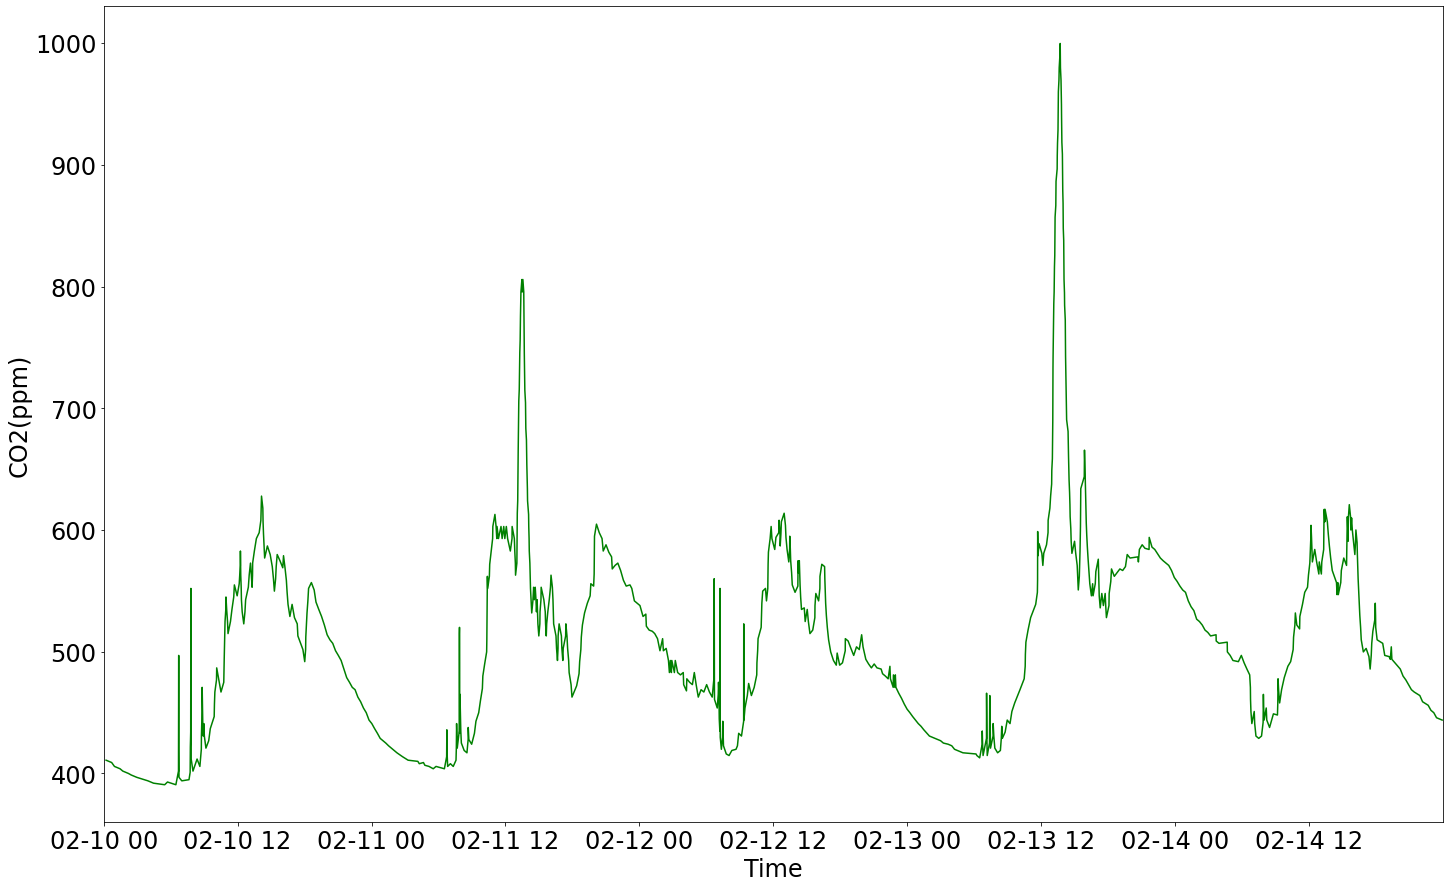

In [ ]:
##Weekday for 3 rooms
room = 'room-3-031'
CO2 = 'CO2'

callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callCO2_3_031_weekday = callBase + room + '/' + str(CO2).replace(' ', '%20') + '/raw/historic/?startTime=' + weekdaystartDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + weekdayendDate.isoformat().replace('+00:00', 'Z')
usbCO2_3_031_weekday = json.loads(

urllib.request
  .urlopen(callCO2_3_031_weekday)
  .read()
  .decode('utf-8')
)['historic']['values']


print(callCO2_3_031_weekday)
print(CO2+' has '+str(len(usbCO2_3_031_weekday))+' readings. ')##avalible readings for CO2

dfCO2_3_031_weekday = pd.DataFrame.from_records(usbCO2_3_031_weekday, exclude=['duration'])
dfCO2_3_031_weekday.index = pd.to_datetime(dfCO2_3_031_weekday["time"])
dfCO2_3_031_weekday = dfCO2_3_031_weekday.drop(columns="time")
dfCO2_3_031_weekday

fig, ax = plt.subplots(figsize=(24,15)) 

plt.xlim(weekdaystartDate,weekdayendDate)

ax.set_xlabel('Time')
ax.set_ylabel('CO2(ppm)', color='black')
ax.plot(dfCO2_3_031_weekday["value"], color='green')
ax.tick_params(axis='y', labelcolor='black')

plt.show()

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-3-032/CO2/raw/historic/?startTime=2020-02-10T00:00:00Z&endTime=2020-02-14T23:59:59Z
CO2 has 1037 readings. 


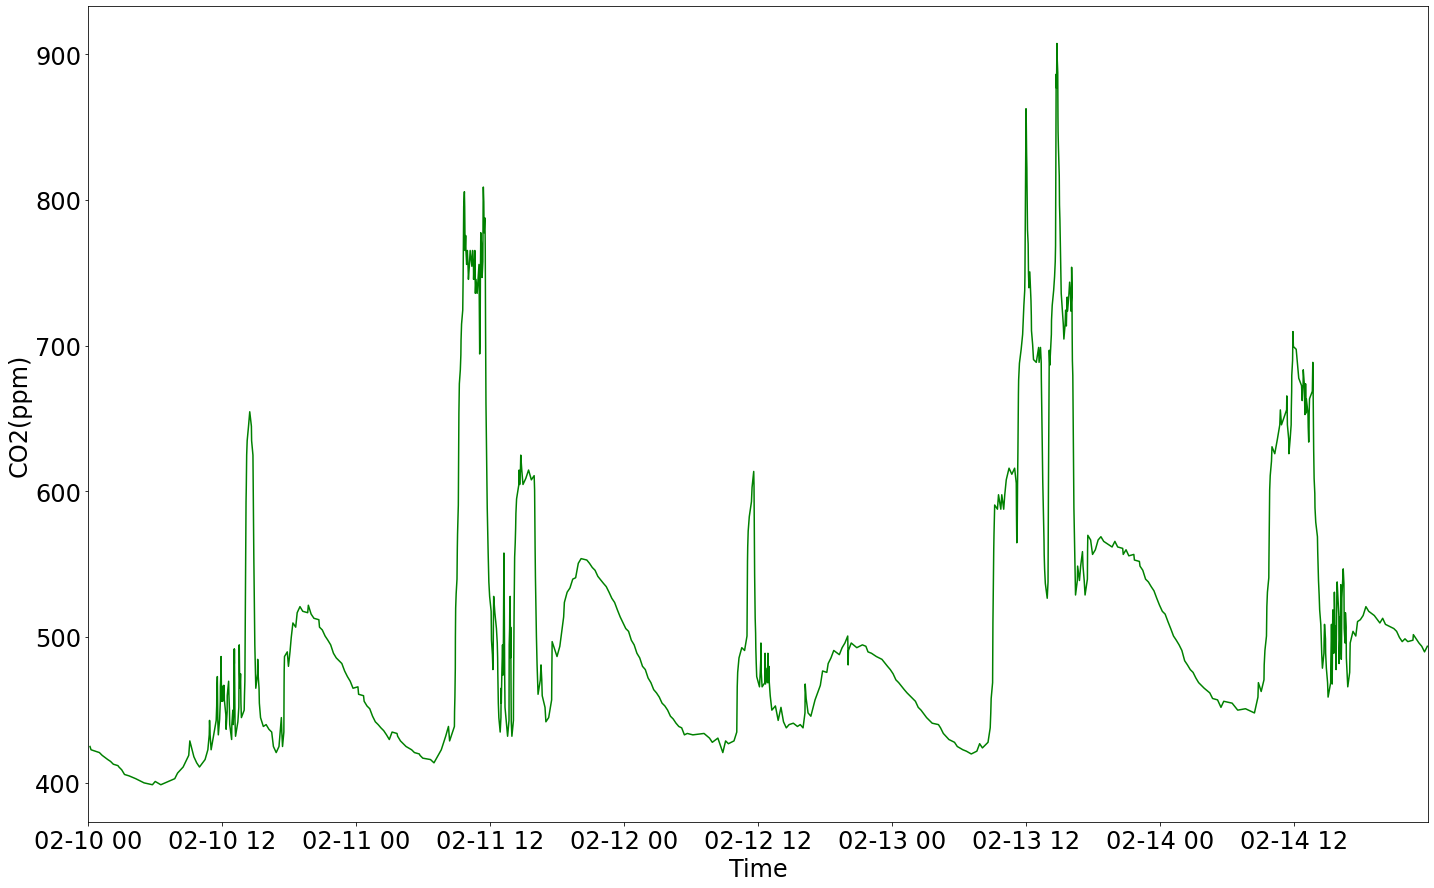

In [ ]:
room = 'room-3-032'
CO2 = 'CO2'

callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callCO2_3_032_weekday = callBase + room + '/' + str(CO2).replace(' ', '%20') + '/raw/historic/?startTime=' + weekdaystartDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + weekdayendDate.isoformat().replace('+00:00', 'Z')
usbCO2_3_032_weekday = json.loads(

urllib.request
  .urlopen(callCO2_3_032_weekday)
  .read()
  .decode('utf-8')
)['historic']['values']


print(callCO2_3_032_weekday)
print(CO2+' has '+str(len(usbCO2_3_032_weekday))+' readings. ')##avalible readings for CO2

dfCO2_3_032_weekday = pd.DataFrame.from_records(usbCO2_3_032_weekday, exclude=['duration'])
dfCO2_3_032_weekday.index = pd.to_datetime(dfCO2_3_032_weekday["time"])
dfCO2_3_032_weekday = dfCO2_3_032_weekday.drop(columns="time")
dfCO2_3_032_weekday

fig, ax = plt.subplots(figsize=(24,15)) 

plt.xlim(weekdaystartDate,weekdayendDate)

ax.set_xlabel('Time')
ax.set_ylabel('CO2(ppm)', color='black')
ax.plot(dfCO2_3_032_weekday["value"], color='green')
ax.tick_params(axis='y', labelcolor='black')

plt.show()

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-4-018/CO2/raw/historic/?startTime=2020-02-10T00:00:00Z&endTime=2020-02-14T23:59:59Z
CO2 has 746 readings. 


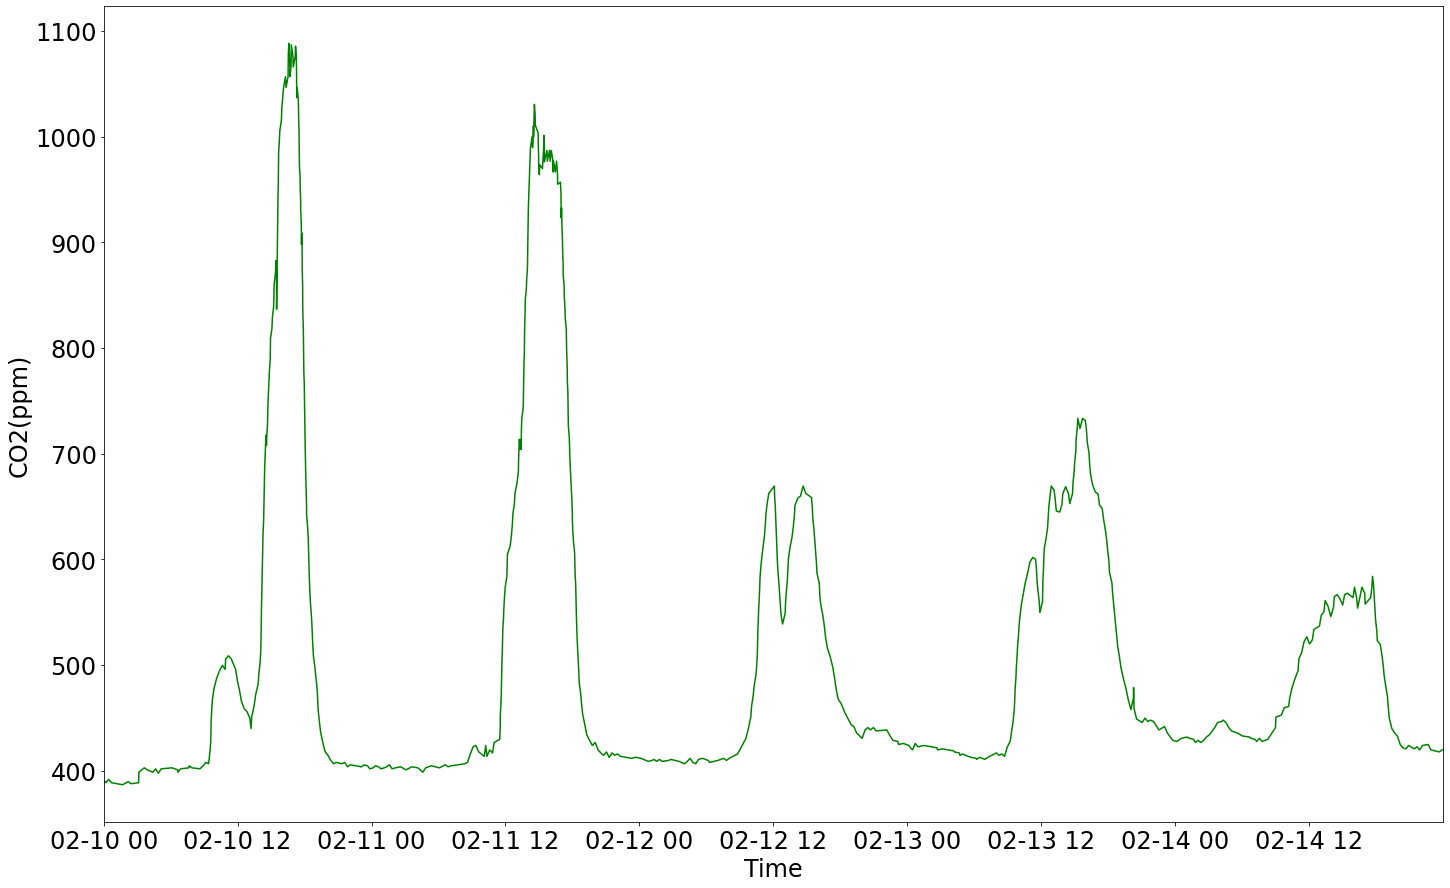

In [ ]:
room = 'room-4-018'
CO2 = 'CO2'

callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callCO2_4_018_weekday = callBase + room + '/' + str(CO2).replace(' ', '%20') + '/raw/historic/?startTime=' + weekdaystartDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + weekdayendDate.isoformat().replace('+00:00', 'Z')
usbCO2_4_018_weekday = json.loads(

urllib.request
  .urlopen(callCO2_4_018_weekday)
  .read()
  .decode('utf-8')
)['historic']['values']


print(callCO2_4_018_weekday)
print(CO2+' has '+str(len(usbCO2_4_018_weekday))+' readings. ')##avalible readings for CO2

dfCO2_4_018_weekday = pd.DataFrame.from_records(usbCO2_4_018_weekday, exclude=['duration'])
dfCO2_4_018_weekday.index = pd.to_datetime(dfCO2_4_018_weekday["time"])
dfCO2_4_018_weekday = dfCO2_4_018_weekday.drop(columns="time")
dfCO2_4_018_weekday

fig, ax = plt.subplots(figsize=(24,15)) 

plt.xlim(weekdaystartDate,weekdayendDate)

ax.set_xlabel('Time')
ax.set_ylabel('CO2(ppm)', color='black')
ax.plot(dfCO2_4_018_weekday["value"], color='green')
ax.tick_params(axis='y', labelcolor='black')

plt.show()